In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

sns.set()

### Data preprocessing

In [2]:
df = pd.read_csv('data/sensors/sens_mag.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906906 entries, 0 to 906905
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   accX          906906 non-null  float64
 1   accY          906906 non-null  float64
 2   accZ          906906 non-null  float64
 3   gyrX          906906 non-null  float64
 4   gyrY          906906 non-null  float64
 5   gyrZ          906906 non-null  float64
 6   magX          906906 non-null  float64
 7   magY          906906 non-null  float64
 8   magZ          906906 non-null  float64
 9   latitude      906906 non-null  float64
 10  longtitude    906906 non-null  float64
 11  speed         906906 non-null  float64
 12  vehicleType   906906 non-null  int64  
 13  activityMode  906906 non-null  int64  
 14  timestamp     906906 non-null  object 
dtypes: float64(12), int64(2), object(1)
memory usage: 103.8+ MB


In [4]:
df['activityMode'].value_counts()

6    340637
5    287330
7    278939
Name: activityMode, dtype: int64

In [5]:
df.head()

accX      accY      accZ      gyrX      gyrY      gyrZ  magX  \
0  0.988188 -0.013057 -0.201835  0.005388  0.000568 -0.005809  7.92   
1  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
2  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
3  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
4  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   

        magY  magZ  latitude  longtitude  speed  vehicleType  activityMode  \
0  13.679999  0.54       0.0         0.0    0.0            0             7   
1  13.679999  0.54       0.0         0.0    0.0            0             7   
2  13.679999  0.54       0.0         0.0    0.0            0             7   
3  13.679999  0.54       0.0         0.0    0.0            0             7   
4  13.679999  0.54       0.0         0.0    0.0            0             7   

          timestamp  
0  00:00:00.0118580  
1  00:00:00.0566580  
2  00:00:00.0573950  
3  00:00:00.0583960  
4  00:00:00.0593960

In [6]:
df.describe().T

count       mean        std        min        25%        50%  \
accX          906906.0   0.992457   0.045658   0.514595   0.984771   0.989286   
accY          906906.0  -0.004602   0.051769  -0.772929  -0.013423  -0.011105   
accZ          906906.0  -0.180837   0.050115  -0.561332  -0.202445  -0.191707   
gyrX          906906.0  -0.001367   0.036558  -0.418669  -0.001448   0.000195   
gyrY          906906.0  -0.000383   0.016987  -0.667663  -0.003329  -0.000440   
gyrZ          906906.0   0.000721   0.021856  -0.351248  -0.001888   0.000312   
magX          906906.0   6.729887   2.194027 -18.180000   4.980000   6.420000   
magY          906906.0  20.525236   7.102529  10.139999  11.880000  26.039999   
magZ          906906.0  -3.139931   7.972714 -23.460000 -11.160000  -6.360000   
latitude      906906.0  59.841965   0.226855   0.000000  59.832540  59.834885   
longtitude    906906.0  29.944120   0.113559   0.000000  29.938776  29.939589   
speed         906906.0  13.067545  18.981298   0.000000   0.240000   3.870000   
vehicleType   906906.0   0.000000   0.000000   0.000000   0.000000   0.000000   
activityMode  906906.0   5.990748   0.790134   5.000000   5.000000   6.000000   

                    75%        max  
accX           1.002953   2.261069  
accY           0.005613   0.764143  
accZ          -0.161810   0.185606  
gyrX           0.001607   0.494575  
gyrY           0.002321   0.277956  
gyrZ           0.004276   0.444099  
magX           7.680000  13.259999  
magY          26.939999  30.599998  
magZ           3.060000  11.219999  
latitude      59.857822  59.858900  
longtitude    29.953207  29.953854  
speed         19.130000  62.530000  
vehicleType    0.000000   0.000000  
activityMode   7.000000   7.000000

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')

In [8]:
df.drop(['speed', 'vehicleType', 'latitude', 'longtitude'], axis=1, inplace=True)

In [9]:
df.loc[:, 'activityMode'] = df.loc[:, 'activityMode'] - 5 # [5, 6, 7] -> [0, 1, 2]

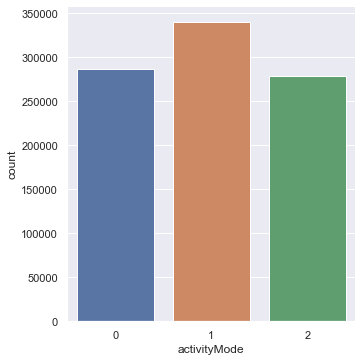

In [10]:
sns.catplot(x='activityMode', kind='count', data=df)
plt.show()

In [11]:
df.head()

accX      accY      accZ      gyrX      gyrY      gyrZ  magX  \
0  0.988188 -0.013057 -0.201835  0.005388  0.000568 -0.005809  7.92   
1  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
2  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
3  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   
4  0.991727 -0.014399 -0.200493  0.004777  0.003012 -0.003366  7.92   

        magY  magZ  activityMode                  timestamp  
0  13.679999  0.54             2 1900-01-01 00:00:00.011858  
1  13.679999  0.54             2 1900-01-01 00:00:00.056658  
2  13.679999  0.54             2 1900-01-01 00:00:00.057395  
3  13.679999  0.54             2 1900-01-01 00:00:00.058396  
4  13.679999  0.54             2 1900-01-01 00:00:00.059396

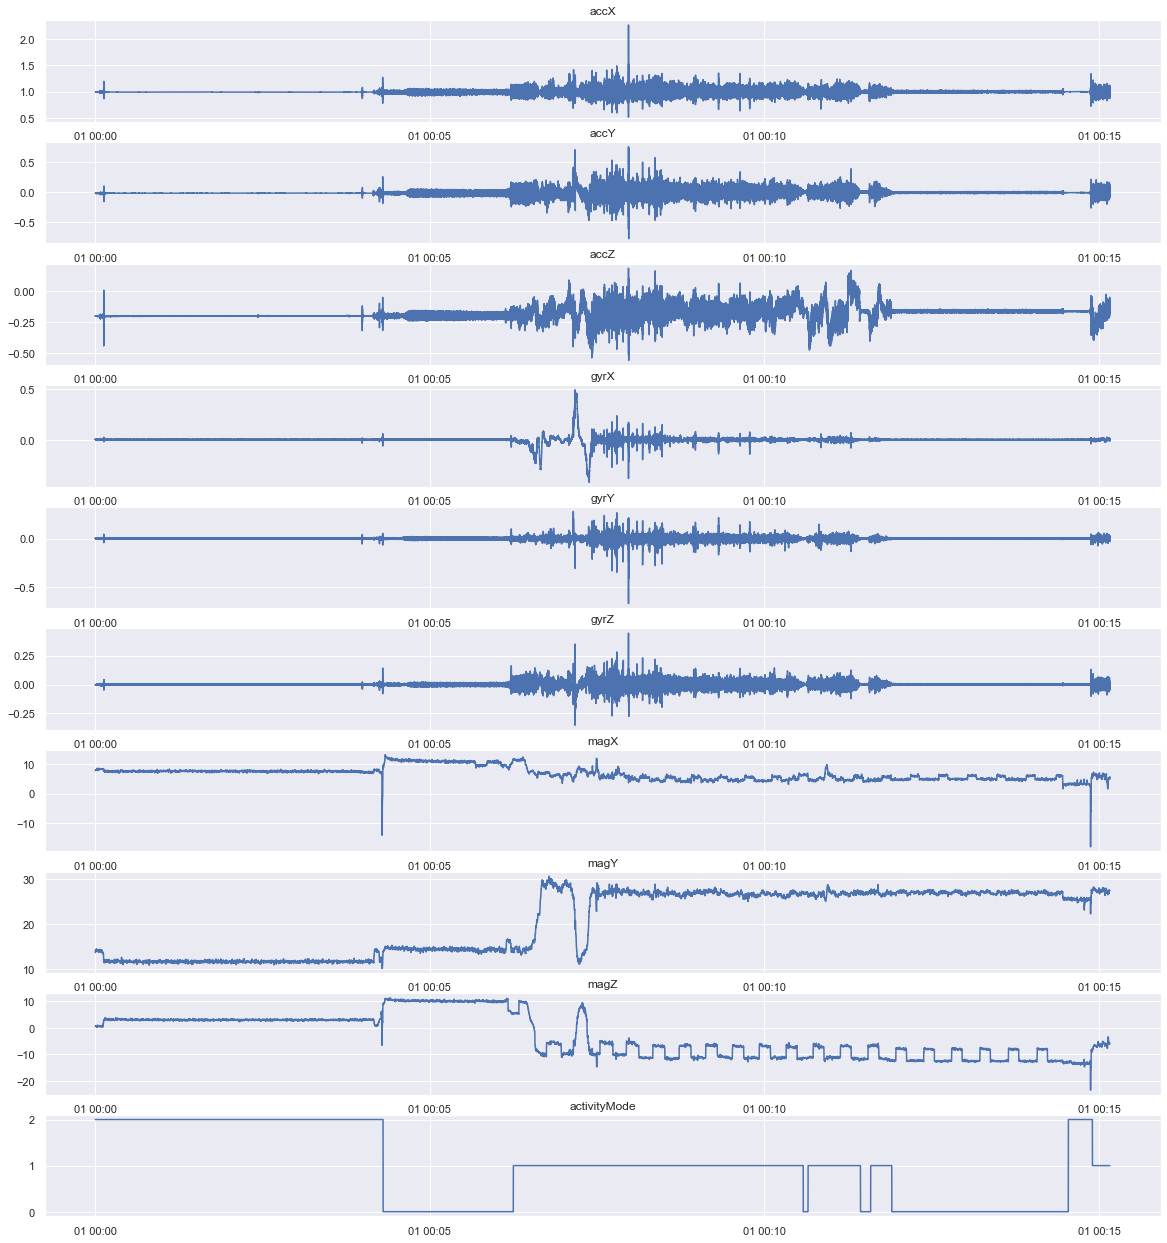

In [12]:
fig, ax = plt.subplots(10, 1, figsize=(20, 22))
for i, column in enumerate(df.columns[:-1]):
    ax[i].plot(df['timestamp'], df[column])
    ax[i].set_title(column)

### Data standardization with MinMaxScaler

In [13]:
df.iloc[:, :-2] = MinMaxScaler().fit_transform(df.iloc[:, :-2])

In [14]:
df.describe().T

count      mean       std  min       25%       50%       75%  \
accX          906906.0  0.273615  0.026143  0.0  0.269215  0.271800  0.279625   
accY          906906.0  0.499864  0.033680  0.0  0.494125  0.495634  0.506510   
accZ          906906.0  0.509406  0.067094  0.0  0.480477  0.494854  0.534880   
gyrX          906906.0  0.456944  0.040031  0.0  0.456856  0.458656  0.460201   
gyrY          906906.0  0.705654  0.017964  0.0  0.702539  0.705594  0.708514   
gyrZ          906906.0  0.442535  0.027480  0.0  0.439255  0.442020  0.447005   
magX          906906.0  0.792299  0.069785  0.0  0.736641  0.782443  0.822519   
magY          906906.0  0.507587  0.347142  0.0  0.085044  0.777126  0.821114   
magZ          906906.0  0.585930  0.229894  0.0  0.354671  0.493080  0.764706   
activityMode  906906.0  0.990748  0.790134  0.0  0.000000  1.000000  2.000000   

              max  
accX          1.0  
accY          1.0  
accZ          1.0  
gyrX          1.0  
gyrY          1.0  
gyrZ          1.0  
magX          1.0  
magY          1.0  
magZ          1.0  
activityMode  2.0

In [16]:
df.to_csv('data/sensors/final_sens.csv', index=False)